# Pymaceuticals Inc.
---

### Analysis

- In the summary statistics, ramicane, capomulin, ceftamin, and infubinol had the smallest tumor volume standard error, respectively. This made these drugs the optimal choices to further drill down upon and investigate drug efficacy.
As you look at the mean tumor volumes, you'll notice the mice on these (4) drugs also demonstrated the smallest mean but infubinol did have an outlier in their results while the rest did not.
The final tumor sizes were found to be smallest in ramicane at 36.6 (mm3) and capomulin at 38.1 (mm3).
The correlation of 0.84 proves there is a positive correlation between weight and average tumor volume for mice on the capomulin regimen.
I would recommend further investigating ramicane and capomulin in order to derive additional correlations and possible insights.
  
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

merge_df = pd.merge(study_results, mouse_metadata, on=["Mouse ID"], how="left")

# Display the data table for preview

merge_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.

merge_df["Mouse ID"].nunique()


249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

unique_df = merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

unique_df


array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_df = merge_df[merge_df["Mouse ID"] == "g989"]

duplicate_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = merge_df[merge_df["Mouse ID"] != "g989"]

clean_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [9]:
# Checking the number of mice in the clean DataFrame.

clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
variance = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std_dev = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.

summary_statistics = pd.DataFrame({"Mean Tumor Volume" : mean,
                                   "Median Tumor Volume" : median,
                                   "Tumor Volume Variance" : variance,
                                   "Tumor Volume Std. Dev." : std_dev,
                                   "Tumor Volume Std. Err." : sem})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

agg_method = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])

agg_method


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

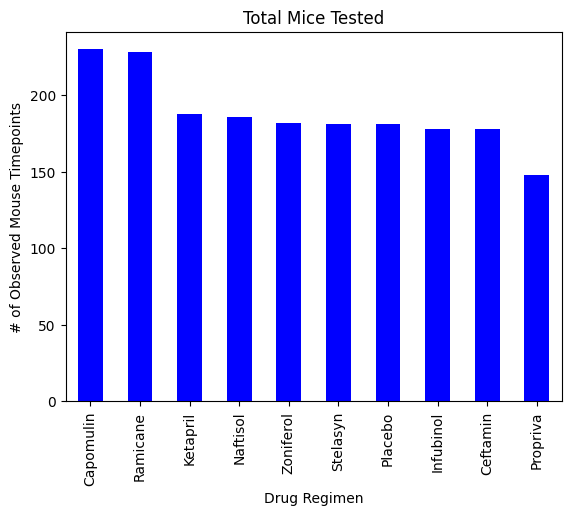

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mice_values = clean_df["Drug Regimen"].value_counts()

pandas_bar = mice_values.plot.bar(color='b')  

# Set the xlabel, ylabel, and title using class methods

plt.title("Total Mice Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


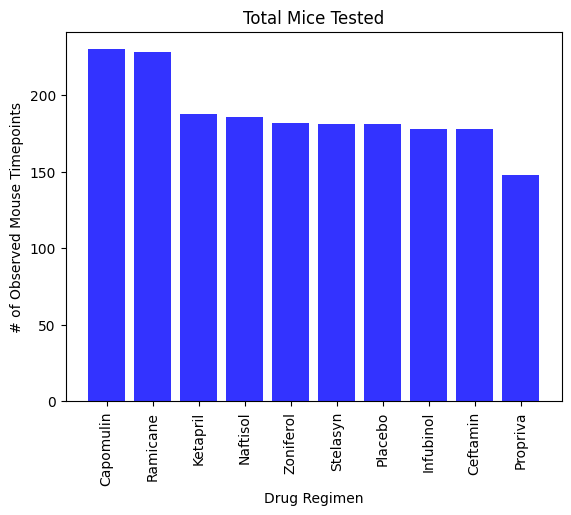

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = mice_values.index.values
y_axis = mice_values.values

plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

plt.title("Total Mice Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()


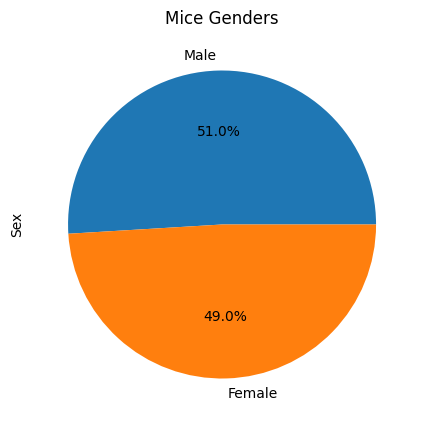

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_sex = clean_df["Sex"].value_counts()

plot = mice_sex.plot.pie(
    labels = ["Male", "Female"],
    title = "Mice Genders",
    ylabel = "Sex",
    autopct = "%1.1f%%",
    fontsize = 10,
    figsize = (5, 5),)

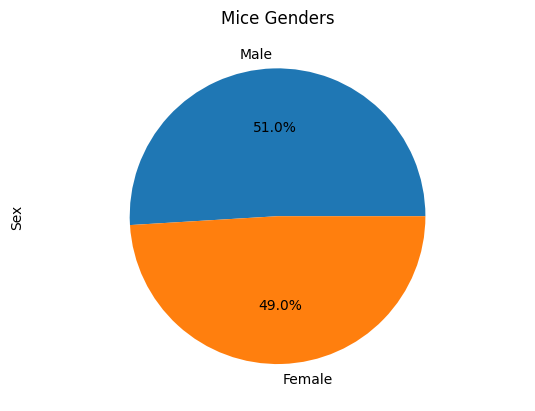

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex = ["Male", "Female"]
sex_data = ["50.957447290", "49.042552710"]

plt.axis("equal")
plt.title("Mice Genders")
plt.ylabel("Sex")
plt.pie(sex_data, labels=sex,autopct="%1.1f%%")

plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse

Capomulin_max = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_max = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_max = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_max = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Capomulin_merge = pd.merge(Capomulin_max, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge = pd.merge(Ramicane_max, clean_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge = pd.merge(Infubinol_max, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge = pd.merge(Ceftamin_max, clean_df, on=("Mouse ID","Timepoint"),how="left")

In [20]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments = clean_df[clean_df["Drug Regimen"].isin(treatment_list)]
treatment_max = treatments.groupby('Mouse ID').max()['Timepoint']
final_tumor_vol = pd.merge(treatment_max, clean_df, on=("Mouse ID","Timepoint"),how="left")

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatment_list:
    max_timepoint = final_tumor_vol.loc[final_tumor_vol["Drug Regimen"] == treatment,:]
    quartiles = max_timepoint["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerquart = quartiles[0.25]
    upperquart = quartiles[0.75]
    iqr = upperquart-lowerquart

# add subset 
    max_drug = max_timepoint.loc[:,"Tumor Volume (mm3)"]
    tumor_vol.append(max_timepoint)
    
# Determine outliers using upper and lower bounds

    lower_bound = lowerquart - (1.5*iqr)
    upper_bound = upperquart + (1.5*iqr)
    outlier = max_timepoint.loc[(max_timepoint['Tumor Volume (mm3)'] < lower_bound) | (max_timepoint['Tumor Volume (mm3)'] > upper_bound)]
    
    print(f"The lower quartile of Tumor Volume (mm3) for {treatment} is: {lowerquart}")
    print(f"The upper quartile of Tumor Volume (mm3) for {treatment} is: {upperquart}")
    print(f"The interquartile range of Tumor Volume (mm3) for {treatment} is: {iqr}")
    print(f"The the median of Final Tumor Volume (mm3) for {treatment} is: {quartiles[0.5]} ")
    print(f"\nValues below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    if len(outlier) == 0:
        print(f"\n{treatment} has no potential outliers\n")
        print("----------------------------------------")
        
    else:
        print(f"\nPotential outliers for {treatment}")
        print(outlier.to_string(index=False))
        print("----------------------------------------")
        

The lower quartile of Tumor Volume (mm3) for Capomulin is: 32.37735684
The upper quartile of Tumor Volume (mm3) for Capomulin is: 40.1592203
The interquartile range of Tumor Volume (mm3) for Capomulin is: 7.781863460000004
The the median of Final Tumor Volume (mm3) for Capomulin is: 38.1251644 

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Capomulin has no potential outliers

----------------------------------------
The lower quartile of Tumor Volume (mm3) for Ramicane is: 31.56046955
The upper quartile of Tumor Volume (mm3) for Ramicane is: 40.65900627
The interquartile range of Tumor Volume (mm3) for Ramicane is: 9.098536719999998
The the median of Final Tumor Volume (mm3) for Ramicane is: 36.56165229 

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Ramicane has no potential outliers

----------------------------------------
The lower quartile of Tumor Volume (mm3) for Infubinol is: 54.

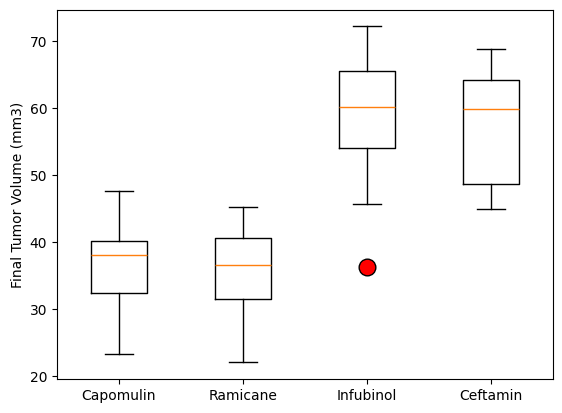

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

tumor_data = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]

fig1, ax1 = plt.subplots()
plt.ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_data, tick_labels=treatment_list, flierprops={'markerfacecolor':'red', 'marker':'o', 'markersize' : '12'})
plt.show()

## Line and Scatter Plots

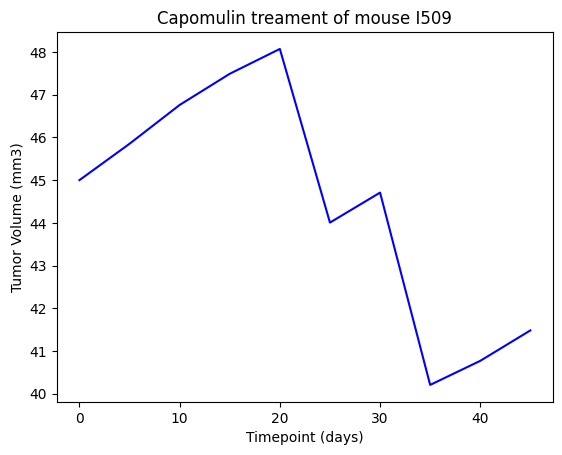

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_capomulin = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
fig2, ax2 = plt.subplots()
ax2.set_title("Capomulin treament of mouse I509")
ax2.set_ylabel("Tumor Volume (mm3)")
ax2.set_xlabel("Timepoint (days)")
ax2.plot(mouse_capomulin["Timepoint"],mouse_capomulin["Tumor Volume (mm3)"],color="blue")
plt.show()

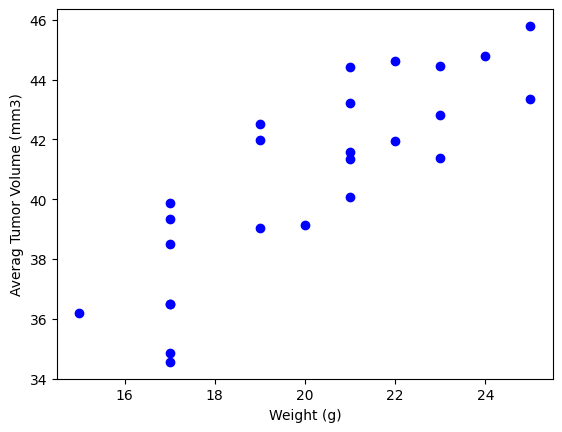

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

fig3, ax3 = plt.subplots()
capomulin_weight = Capomulin_df.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()

plt.scatter(capomulin_weight["Weight (g)"],capomulin_weight["Tumor Volume (mm3)"], color="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient = round(st.pearsonr(capomulin_weight["Weight (g)"],capomulin_weight["Tumor Volume (mm3)"])[0],2)



The correlation between mouse weight and average tumor volume is 0.84


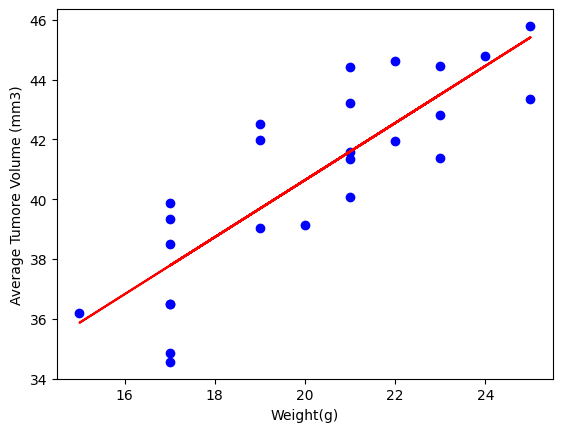

In [27]:
print(f"The correlation between mouse weight and average tumor volume is {correlation_coefficient}")

x_values = capomulin_weight["Weight (g)"]
y_values = capomulin_weight["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig4, ax4 = plt.subplots()
plt.scatter(x_values,y_values, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumore Volume (mm3)")
ax1.annotate(line_equation, xy=(20, 40), xycoords="data",xytext=(0.8, 0.95), textcoords="axes fraction",horizontalalignment="right", verticalalignment="top",color="red")

plt.show()